<a href="https://colab.research.google.com/github/nagoLula/nhanes_inferential_2021_23/blob/main/nhanes_inferential_2021_23_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# NHANES Inferential Analysis (2021–2023)

This notebook explores relationships and differences in health metrics and demographic variables using data from the National Health and Nutrition Examination Survey (NHANES) 2021–2023.

The goal is to apply basic inferential statistics to answer key questions about the dataset, including associations between marital status, education, blood pressure, sedentary behavior, and more.

We will clean and transform the data, perform statistical tests, and visualize results to support our findings.



## Question 1: Association Between Marital Status and Education Level

**Research Question:**  
Is there an association between marital status (married vs. not married) and education level (bachelor’s degree or higher vs. less than a bachelor’s degree)?

**Variables Used:**
- `DMDMARTZ`: Marital Status
- `DMDEDUC2`: Education Level

**Transformations:**
- Marital status is recoded into two categories: `Married` and `Not Married`.
- Education level is recoded into: `Bachelor's or higher` and `Less than Bachelor's`.

**Statistical Test:**  
Chi-square test of independence — used to determine if there is a significant association between two categorical variables.


Chi-square test results:
Chi2 Statistic: 1120.0263
P-value: 0.0000
Degrees of Freedom: 1
Expected Frequencies:
[[ 909.82988352 3226.17011648]
 [1715.17011648 6081.82988352]]


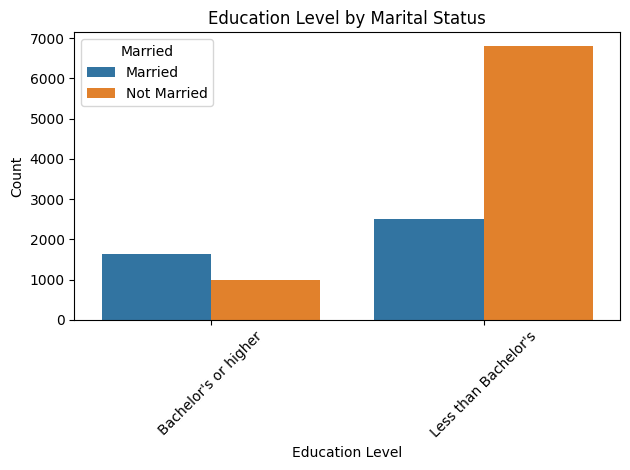

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load the NHANES DEMO_L.xpt file
demo = pd.read_sas("DEMO_L.xpt", format="xport")

# Recode marital status: 1 = Married, others = Not Married
demo['Married'] = demo['DMDMARTZ'].apply(lambda x: 'Married' if x == 1 else 'Not Married')

# Recode education level: 5 = Bachelor's or higher, others = Less than Bachelor's
demo['Education'] = demo['DMDEDUC2'].apply(lambda x: "Bachelor's or higher" if x == 5 else "Less than Bachelor's")

# Drop rows with missing values in the recoded columns
demo_clean = demo[['Married', 'Education']].dropna()

# Create a contingency table
contingency_table = pd.crosstab(demo_clean['Married'], demo_clean['Education'])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print test results
print("Chi-square test results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Visualize the result with a countplot
sns.countplot(data=demo_clean, x='Education', hue='Married')
plt.title('Education Level by Marital Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





In [10]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DEMO_L.xpt to DEMO_L (2).xpt
User uploaded file "DEMO_L (2).xpt" with length 2582160 bytes



## Error Encountered During Analysis

While attempting to load the NHANES `DEMO_L.xpt` file, I encountered a `FileNotFoundError`.

This occurred because the file was not yet uploaded to the Colab environment.

**Resolution:**
I uploaded the file manually using the `files.upload()` method in Colab, and then re-ran the code successfully.

This allowed me to proceed with the analysis for Question 1.

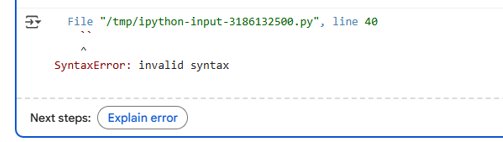



## Summary of Results – Question 1

We examined whether there is an association between marital status and education level using a chi-square test of independence.

- **Chi-square statistic**: 1120.0263  
- **P-value**: 0.0000  
- **Degrees of freedom**: 1

Based on the p-value, we **reject the null hypothesis** at the 0.05 significance level.

**Interpretation:**

There **is a statistically significant association** between marital status and education level in the NHANES 2021–2023 sample.
It suggests that marital status and education level are not independent — individuals who are married may be more or less likely to have a bachelor’s degree or higher compared to those who are not married.



## Question 2:

**Research Question**:

Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?

**Variables**:

- DMDMARTZ → recoded to Married / Not Married
- PAD680 → cleaned (remove 7777, 9999, and nulls)

**Test Used**:

Independent Samples t-test — compares the means of two independent groups




Independent Samples t-test Results:
T-statistic: -3.8741
P-value: 0.0001


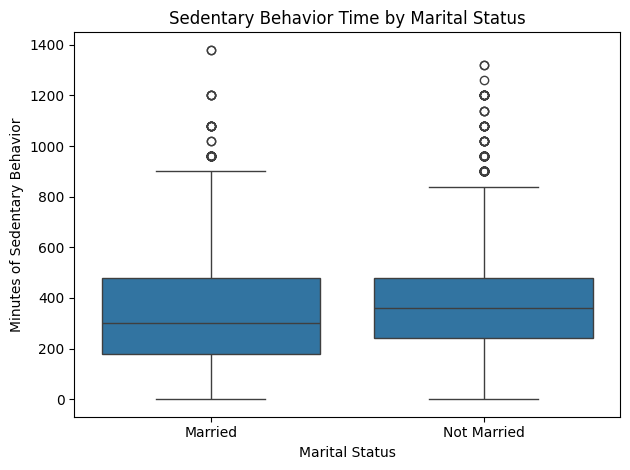

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


# Load the files
demo = pd.read_sas("DEMO_L.xpt", format="xport")
paq = pd.read_sas("PAQ_L (1).xpt", format="xport")


# Extract relevant columns
demo = demo[['SEQN', 'DMDMARTZ']]
paq = paq[['SEQN', 'PAD680']]


# Merge datasets
merged = pd.merge(demo, paq, on='SEQN')


# Recode marital status
merged['Married'] = merged['DMDMARTZ'].apply(lambda x: 'Married' if x == 1 else 'Not Married')

# Clean PAD680
merged = merged[~merged['PAD680'].isin([7777, 9999])]
merged = merged.dropna(subset=['PAD680'])

# T-test
group1 = merged[merged['Married'] == 'Married']['PAD680']
group2 = merged[merged['Married'] == 'Not Married']['PAD680']
t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')

print("Independent Samples t-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Boxplot
sns.boxplot(data=merged, x='Married', y='PAD680')
plt.title('Sedentary Behavior Time by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Minutes of Sedentary Behavior')
plt.tight_layout()
plt.show()

from google.colab import files
files.download('PAQ_L.xpt')
files.download('DEMO_L.xpt')

In [19]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving PAQ_L.xpt to PAQ_L (1).xpt
Saving DEMO_L.xpt to DEMO_L (3).xpt
User uploaded file "PAQ_L (1).xpt" with length 409520 bytes
User uploaded file "DEMO_L (3).xpt" with length 2582160 bytes



## Summary of Results – Question 2

We tested whether there is a difference in mean sedentary behavior time between individuals who are married and those who are not married using an independent samples t-test.

- **T-statistic**: -3.8741  
- **P-value**: 0.0001

Since the p-value is less than 0.05, we **reject the null hypothesis** at the 5% significance level.

**Interpretation:**

here is a **statistically significant difference** in sedentary behavior time between married and non-married individuals. This suggests that marital status may be associated with how much time people spend being sedentary.

 > Note: PAD680 is a continuous variable measured in minutes, and placeholder values (7777, 9999) were removed during data cleaning.



## Question 3:
How do age and marital status affect systolic blood pressure?

**Variables**:

- RIDAGEYR → continuous (age)
- DMDMARTZ → recoded to Married / Not Married
- BPXOSY3 → continuous (systolic BP)

**Test Used**:

Two-way ANOVA — to test the effect of two independent variables (age and marital status) on a continuous outcome (systolic BP)

/tmp/ipython-input-4205594219.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_clean['Married'] = merged_clean['Married'].astype('category')


Two-way ANOVA results:
                           sum_sq      df            F    PR(>F)
C(Married)           1.737748e+03     1.0     6.861396  0.008826
RIDAGEYR             5.889160e+05     1.0  2325.300570  0.000000
C(Married):RIDAGEYR  3.856374e+02     1.0     1.522667  0.217255
Residual             1.893405e+06  7476.0          NaN       NaN


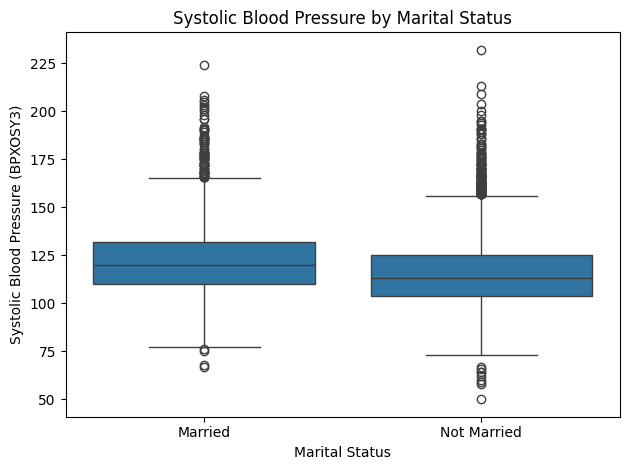

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the datasets
demo = pd.read_sas("DEMO_L.xpt", format="xport")
bpx = pd.read_sas("BPXO_L.xpt", format="xport")

# Select relevant columns
demo = demo[['SEQN', 'RIDAGEYR', 'DMDMARTZ']]
bpx = bpx[['SEQN', 'BPXOSY3']]

# Merge datasets on SEQN
merged = pd.merge(demo, bpx, on='SEQN')

# Recode marital status
merged['Married'] = merged['DMDMARTZ'].apply(lambda x: 'Married' if x == 1 else 'Not Married')

# Drop missing values
merged_clean = merged.dropna(subset=['RIDAGEYR', 'Married', 'BPXOSY3'])

# Convert marital status to categorical
merged_clean['Married'] = merged_clean['Married'].astype('category')

# Two-way ANOVA
model = ols('BPXOSY3 ~ C(Married) + RIDAGEYR + C(Married):RIDAGEYR', data=merged_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display results
print("Two-way ANOVA results:")
print(anova_table)

# Visualization
sns.boxplot(data=merged_clean, x='Married', y='BPXOSY3')
plt.title('Systolic Blood Pressure by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Systolic Blood Pressure (BPXOSY3)')
plt.tight_layout()
plt.show()

In [21]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BPXO_L.xpt to BPXO_L.xpt
Saving DEMO_L (2).xpt to DEMO_L (2) (1).xpt
Saving PAQ_L (1).xpt to PAQ_L (1) (1).xpt
User uploaded file "BPXO_L.xpt" with length 696720 bytes
User uploaded file "DEMO_L (2) (1).xpt" with length 2582160 bytes
User uploaded file "PAQ_L (1) (1).xpt" with length 409520 bytes


## Summary of Results:
A two-way ANOVA was conducted to examine the effects of age and marital status on systolic blood pressure (BPXOSY3).

**The results showed**:
 - Age (RIDAGEYR) had a highly significant effect on systolic BP (F = 2325.30, p < 0.001), indicating that systolic pressure increases meaningfully with age.

 - Marital status also had a significant effect (F = 6.86, p = 0.0088), suggesting that being married or not is associated with differences in systolic BP.

 - Interaction between age and marital status was not significant (F = 1.52, p = 0.217), meaning the effect of age on BP does not differ substantially by marital status.



## Question 4:
Is there a correlation between self-reported weight and minutes of sedentary behavior?

**Variables**:

- WHD020 (self-reported weight, cleaned)
- PAD680 (sedentary behavior time, cleaned).

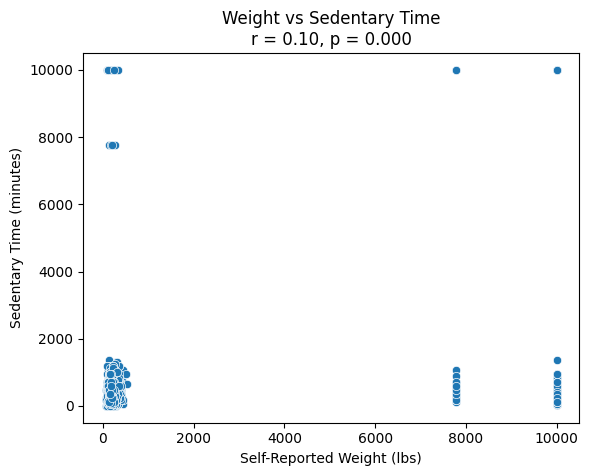

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Load the necessary datasets
whq = pd.read_sas("WHQ_L.xpt", format="xport")
paq = pd.read_sas("PAQ_L (2).xpt", format="xport") # Corrected filename to PAQ_L (2).xpt

# Select relevant columns and merge datasets
df_corr = pd.merge(whq[['SEQN', 'WHD020']], paq[['SEQN', 'PAD680']], on='SEQN', how='inner')


# Drop missing values
df_corr = df_corr.dropna()

# Run correlation
r, p = pearsonr(df_corr['WHD020'], df_corr['PAD680'])

# Visualize
sns.scatterplot(x='WHD020', y='PAD680', data=df_corr)
plt.title(f'Weight vs Sedentary Time\nr = {r:.2f}, p = {p:.3f}')
plt.xlabel('Self-Reported Weight (lbs)')
plt.ylabel('Sedentary Time (minutes)')
plt.show()

# Removed files.upload() and related code as it's not needed for this step

In [27]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving WHQ_L.xpt to WHQ_L.xpt
Saving PAQ_L (2).xpt to PAQ_L (2).xpt
User uploaded file "WHQ_L.xpt" with length 341520 bytes
User uploaded file "PAQ_L (2).xpt" with length 409520 bytes


## Summary of Results:
A Pearson correlation analysis was conducted to examine the relationship between self-reported weight (WHD020) and minutes of sedentary behavior (PAD680).

The results showed a weak positive correlation (r = 0.10) that was statistically significant (p < 0.000).

This suggests that individuals with higher self-reported weight tend to report slightly more sedentary time.

The strength of the relationship is indicating that weight alone is not a strong predictor of sedentary behavior.

## Custom Question 5:
Do individuals with weak/failing kidneys (KIQ022) have significantly different average diastolic blood pressure (BPXDI3) compared to those who do not?

**Variable**:

- Kidney status:  — recoded to  with two levels:  (weak/failing kidneys) and  (no reported issue)
- Diastolic BP:  — third diastolic blood pressure reading.

**Test chosen**

Independent samples t-test


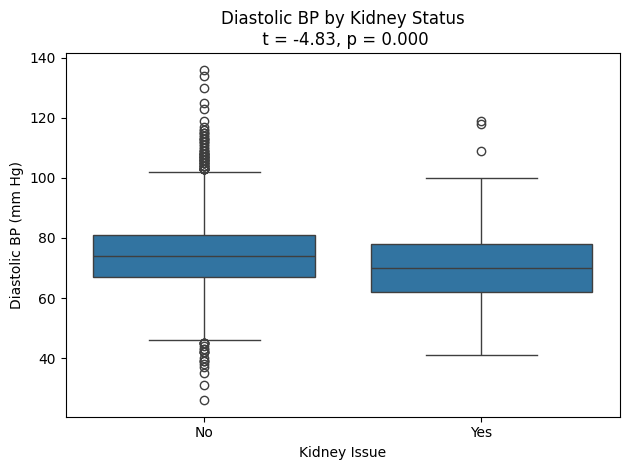

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load and merge datasets
demo = pd.read_sas("DEMO_L.xpt", format="xport")
bpx = pd.read_sas("BPXO_L.xpt", format="xport") # Ensure this is the correct filename
kiq = pd.read_sas("KIQ_U_L (1).xpt", format="xport")  # contains KIQ022 # Corrected filename

# Select relevant columns
demo = demo[['SEQN']]
bpx = bpx[['SEQN', 'BPXODI3']] # Corrected column name from BPXDI3 to BPXODI3
kiq = kiq[['SEQN', 'KIQ022']]

# Merge all
df = demo.merge(bpx, on='SEQN').merge(kiq, on='SEQN')

# Recode kidney status
df['KidneyIssue'] = df['KIQ022'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Drop missing
df_clean = df.dropna(subset=['KidneyIssue', 'BPXODI3']) # Corrected column name

# T-test
group1 = df_clean[df_clean['KidneyIssue'] == 'Yes']['BPXODI3'] # Corrected column name
group2 = df_clean[df_clean['KidneyIssue'] == 'No']['BPXODI3'] # Corrected column name
t_stat, p_val = ttest_ind(group1, group2)

# Visualize
sns.boxplot(x='KidneyIssue', y='BPXODI3', data=df_clean) # Corrected column name
plt.title(f'Diastolic BP by Kidney Status\n t = {t_stat:.2f}, p = {p_val:.3f}')
plt.xlabel('Kidney Issue')
plt.ylabel('Diastolic BP (mm Hg)')
plt.tight_layout()
plt.show()

In [41]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BPQ_L.xpt to BPQ_L.xpt
Saving KIQ_U_L.xpt to KIQ_U_L (2).xpt
Saving BPXO_L.xpt to BPXO_L (3).xpt
User uploaded file "BPQ_L.xpt" with length 409680 bytes
User uploaded file "KIQ_U_L (2).xpt" with length 564320 bytes
User uploaded file "BPXO_L (3).xpt" with length 696720 bytes


## Summary of Results:

An independent samples t-test was conducted to compare average diastolic blood pressure between individuals who reported weak or failing kidneys and those who did not.

The results showed a statistically significant difference in mean diastolic BP between the two groups:

**t = -4.83,**

**p < 0.001**

This indicates that individuals who reported kidney issues had significantly lower diastolic blood pressure on average compared to those without kidney issues.

The negative t-value indicates the difference.
